# <font color='blue'>Video Game Sales Prediction 1980 - 2020</font>

## Table of Contents
6. [Preparing Training and Testing Sets](#f_ID)

    6.1 [Splitting into Train and Test Sets](#f1_ID)
    
    6.2 [Feature Scaling](#f2_ID)
    
7. [Feature Selection](#g_ID)

    7.1 [Recursive feature elimination with Cross-validation](#g1_ID)

8. [Feature Extraction](#h_ID)

    8.1 [Prinicpal Component Analysis (PCA)](#h1_ID)

## <a id="f_ID">6. Preparing Training and Testing Sets</a>

In [ ]:
# Replace missing values in Year with 0
vgsales['Year'][vgsales['Year'].isnull()] = 0

In [81]:
# Check missing values in Year
vgsales[vgsales['Year'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [ ]:
# Replace missing values in Publisher with 0
vgsales['Publisher'][vgsales['Publisher'].isnull()] = 0

In [83]:
# Check missing values in Publisher
vgsales[vgsales['Publisher'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [84]:
# Check dimension of the dataset
vgsales.shape

(16598, 11)

In [85]:
# Make a copy of dataframe
vgsales_fct = vgsales.copy()

In [86]:
# Factorize 'Platform', 'Genre', 'Publisher', and 'Name' variables
vgsales_fct['Platform'] = pd.Categorical(vgsales_fct['Platform'], ordered=False).codes +1
vgsales_fct['Genre'] = pd.Categorical(vgsales_fct['Genre'], ordered=False).codes +1
vgsales_fct['Publisher'] = pd.Categorical(vgsales_fct['Publisher'], ordered=False).codes +1
vgsales_fct['Name'] = pd.Categorical(vgsales_fct['Name'], ordered=False).codes +1

In [87]:
# Remove 'Global_Sales' column as it is a redundant column for our analysis 
vgsales_fct = vgsales_fct.drop('Global_Sales', axis=1) 

In [88]:
# Look at first 5 records
vgsales_fct.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,11008,27,2006,11,361,41.49,29.02,3.77,8.46
1,2,9328,12,1985,5,361,29.08,3.58,6.81,0.77
2,3,5574,27,2008,7,361,15.85,12.88,3.79,3.31
3,4,11010,27,2009,11,361,15.75,11.01,3.28,2.96
4,5,7347,6,1996,8,361,11.27,8.89,10.22,1.00


In [89]:
# Reformat X variables
X = vgsales_fct.iloc[:, [0, 1, 2, 3, 4, 5, 7, 8, 9]]
X

,Rank,Name,Platform,Year,Genre,Publisher,EU_Sales,JP_Sales,Other_Sales
0,1,11008,27,2006,11,361,29.02,3.77,8.46
1,2,9328,12,1985,5,361,3.58,6.81,0.77
2,3,5574,27,2008,7,361,12.88,3.79,3.31
3,4,11010,27,2009,11,361,11.01,3.28,2.96
4,5,7347,6,1996,8,361,8.89,10.22,1.00
...,...,...,...,...,...,...,...,...,...
16593,16596,11102,7,2002,5,271,0.00,0.00,0.00
16594,16597,5797,8,2003,9,243,0.00,0.00,0.00
16595,16598,8145,17,2008,7,23,0.00,0.00,0.00
16596,16599,5015,5,2010,6,10,0.01,0.00,0.00


In [90]:
# Reformat y variable
y = vgsales_fct['NA_Sales'].values
y

array([4.149e+01, 2.908e+01, 1.585e+01, ..., 0.000e+00, 0.000e+00,
       1.000e-02])

### <a id="f1_ID">6.1 Splitting into Train and Test Sets</a>

In [91]:
# Import Train Test Split library
from sklearn.model_selection import train_test_split

In [92]:
# Split train set (75%) and test set (25%), shuffle = True (default)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [93]:
# Check dimensions of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12448, 9)
(4150, 9)
(12448,)
(4150,)


### <a id="f2_ID">6.2 Feature Scaling</a>

Feature scaling standardizes features and scales to unit variance. This allows for all features to be on the same scale, so machine learning models do not become sensitive to large values.

In [94]:
# Import Standard Scaler library
from sklearn.preprocessing import StandardScaler

In [95]:
# Instantiate Standard Scaler object and fit to X train data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

In [96]:
# Fit to X test data 
X_test_sc = sc.transform(X_test)

In [97]:
# Instantiate Standard Scaler object and fit to X train data
sc_y = StandardScaler()
y_train_sc = sc_y.fit_transform(y_train.reshape(-1, 1))

In [98]:
# Create dataframe with scaled X train data
df = pd.DataFrame(X_train_sc, columns = ["Rank", "Name", "Platform", "Year", "Genre", "Publisher", "EU_Sales", "JP_Sales", "Other_Sales"])
df

,Rank,Name,Platform,Year,Genre,Publisher,EU_Sales,JP_Sales,Other_Sales
0,0.953415,1.684218,1.580705,0.114608,-0.245273,-0.284853,-0.298086,-0.249154,-0.270455
1,0.871589,0.702910,-0.691574,0.099204,0.287471,1.310595,-0.298086,-0.249154,-0.270455
2,0.141402,1.170900,-1.169948,0.114608,1.352958,-0.093849,-0.320493,0.194243,-0.270455
3,0.353983,-0.792918,0.384769,0.153119,0.553843,0.973529,-0.320493,0.099230,-0.270455
4,0.286107,0.910939,1.221924,0.141566,0.021099,-1.071341,-0.320493,-0.249154,-0.213332
...,...,...,...,...,...,...,...,...,...
12443,0.616534,-0.081477,0.384769,0.141566,1.352958,0.956675,-0.320493,-0.249154,-0.213332
12444,0.758115,0.859007,0.025988,0.137715,-1.310759,-0.093849,-0.253274,-0.249154,-0.213332
12445,-0.610647,1.188311,1.221924,0.149268,-1.310759,1.310595,0.060411,-0.249154,-0.041961
12446,-1.553831,0.972777,0.025988,0.114608,-0.245273,1.333066,1.808084,-0.249154,1.329001


## <a id="g_ID">7. Feature Selection</a>

### <a id="g1_ID">7.1 Recursive Feature Elimination with Cross-validation</a>

Recursive Feature Elimination (RFE) is a feature selection method that removes the weakest features until an optimal number of features is selected.

In [99]:
# Import Stratifited KFold and RFECV libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [100]:
# Import linear regression library
from sklearn.linear_model import LinearRegression

In [101]:
# Instantiate linear regression object
lr = LinearRegression()

In [102]:
# Create RFE object and fit to data
rfecv = RFECV(estimator = lr, step = 1, cv=10, scoring='neg_mean_squared_error')
rfecv.fit(X_train_sc, y_train_sc)

RFECV(cv=10, estimator=LinearRegression(), scoring='neg_mean_squared_error')

Optimal number of features : 6


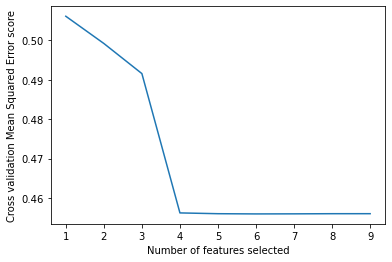

In [103]:
# Determine optimal number of features
print(f"Optimal number of features : {rfecv.n_features_}")

# Plot number of features selected vs. cross-validation mean squared error score
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation Mean Squared Error score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), -rfecv.grid_scores_)
plt.show()

In [104]:
# Show grid scores
rfecv.grid_scores_

array([-0.50609618, -0.49919207, -0.49155361, -0.45622234, -0.4560219 ,
       -0.45596829, -0.45598775, -0.45602333, -0.45602651])

In [105]:
# Show number of features
rfecv.n_features_

6

In [106]:
# Show support
rfecv.support_

array([ True, False, False,  True, False,  True,  True,  True,  True])

In [107]:
# Show ranking
rfecv.ranking_

array([1, 4, 2, 1, 3, 1, 1, 1, 1])

## Recursive Feature Elimination (RFE)

In [108]:
from sklearn.feature_selection import RFE

In [109]:
# Instantiate linear regression object
linreg = LinearRegression()

In [110]:
# Create RFE object and fit to data
rfe = RFE(estimator=linreg, n_features_to_select=6, step=1)
rfe.fit(X_train_sc, y_train_sc)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [111]:
# X train data with selected features
X_train_sc_rfe = rfe.transform(X_train_sc)

In [112]:
# X test data with selected features
X_test_sc_rfe = rfe.transform(X_test_sc)

In [113]:
rfe.ranking_

array([1, 4, 2, 1, 3, 1, 1, 1, 1])

In [114]:
# 6 Selected features
print(df.columns[rfe.ranking_ == 1])

Index(['Rank', 'Year', 'Publisher', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')


Using RFE CV, the optimal number of features selected was 6. For the estimator parameter, linear was chosen over support vector regression as it was more efficent.

## <a id="h_ID">8. Feature Extraction</a>

### <a id="h1_ID">8.1 Prinicpal Component Analysis (PCA)</a>

Prinicpal Component Analysis (PCA) is a linear dimensionality reduction using singular value decompositon to a lower dimensional space.

In [115]:
# Import decomposition and PCA libraries 
from sklearn import decomposition
from sklearn.decomposition import PCA

In [116]:
np.random.seed(6)

In [118]:
# Instantiate PCA object with n_components = 2 and fit to data
pca = decomposition.PCA(n_components=2)
pca.fit(X_train_sc)

PCA(n_components=2)

In [120]:
X_train_pca = pca.transform(X_train_sc)

In [121]:
X_train_pca

array([[-0.75487703, -0.79375253],
       [-0.7735409 ,  1.09013358],
       [-0.30932873,  0.14040094],
       ...,
       [ 0.25604366,  0.55189146],
       [ 2.40213868,  0.59839106],
       [-1.02450059,  0.59741427]])

In [122]:
X_train_pca.shape

(12448, 2)

The dimension of the dataset after applying PCA is (12448, 2).

In [123]:
pca.n_components_

2

In [124]:
pca.explained_variance_

array([2.25791444, 1.08648149])

In [125]:
pca.explained_variance_ratio_

array([0.25085923, 0.12071047])

In [127]:
#The amount of variance that each PC explains
var_Data= pca.explained_variance_ratio_
#Cumulative Variance explained
var_cum_Data=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=7)*100)

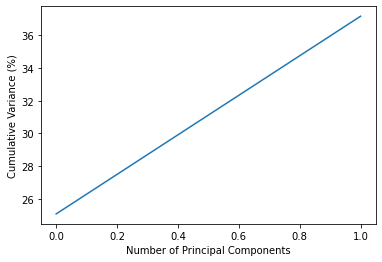

In [128]:
plt.plot(var_cum_Data)
plt.ylabel('Cumulative Variance (%)')
plt.xlabel('Number of Principal Components')
plt.show()

In [129]:
var_cum_Data

array([25.08592, 37.15697])

In [130]:
# Transform X test data
X_test_pca = pca.transform(X_test_sc)

In [131]:
X_test_pca.shape

(4150, 2)

In [132]:
np.random.seed(3)

In [133]:
# Instantiate PCA object with n_components = 6 and fit to data
pca_6 = decomposition.PCA(n_components=6)
pca_6.fit(X_train_sc)

PCA(n_components=6)

In [199]:
X_train_pca_6 = pca_6.transform(X_train_sc)

In [200]:
X_train_pca_6

array([[-0.75487703, -0.79375253, -1.65196998, -0.89635031, -0.67120542,
         0.56542035],
       [-0.7735409 ,  1.09013358, -0.51223074,  0.14091711, -0.67106923,
        -0.83125011],
       [-0.30932873,  0.14040094,  0.12533096,  0.86470242, -1.9325643 ,
        -0.32524122],
       ...,
       [ 0.25604366,  0.55189146, -2.04567981, -1.39519157,  0.31338289,
        -0.11845097],
       [ 2.40213868,  0.59839106, -1.26179843, -0.49583843, -0.11321964,
        -0.35942188],
       [-1.02450059,  0.59741427, -0.74707145,  0.45412474, -1.06378449,
        -1.17054104]])

In [201]:
X_train_pca_6.shape

(12448, 6)

The dimension of the dataset after applying PCA is (12448, 6).

In [137]:
pca_6.n_components_

6

In [138]:
pca_6.explained_variance_

array([2.25791444, 1.08648149, 1.03762426, 1.01028577, 0.98505048,
       0.93816267])

In [139]:
pca_6.explained_variance_ratio_

array([0.25085923, 0.12071047, 0.11528232, 0.11224496, 0.10944126,
       0.10423192])

In [140]:
#The amount of variance that each PC explains
var_Data= pca_6.explained_variance_ratio_
#Cumulative Variance explained
var_cum_Data=np.cumsum(np.round(pca_6.explained_variance_ratio_, decimals=7)*100)

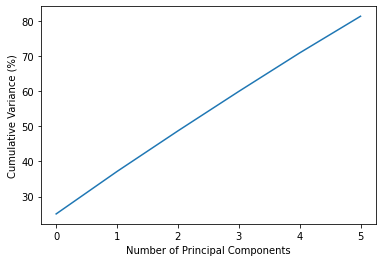

In [141]:
plt.plot(var_cum_Data)
plt.ylabel('Cumulative Variance (%)')
plt.xlabel('Number of Principal Components')
plt.show()

In [142]:
var_cum_Data

array([25.08592, 37.15697, 48.6852 , 59.9097 , 70.85383, 81.27702])

In [143]:
# Transform X test data
X_test_pca_6 = pca_6.transform(X_test_sc)

In [144]:
X_test_pca_6.shape

(4150, 6)

For our analysis, we will use PCA with 6 components.